In [1]:
from datetime import datetime as dt
from arcgis.gis import GIS
from arcgis.geoanalytics.analyze_patterns import forest, glr
gis = GIS('https://ndhagsb01.esri.com/portal', 
          'admin', 
          'esri.agp2', 
          profile="your_enterprise_portal", verify_cert=False)

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

import arcgis
import arcgis.geoanalytics
from arcgis.gis import GIS

from arcgis.geoanalytics.manage_data import run_python_script
from arcgis.geoanalytics.analyze_patterns import forest, glr
from arcgis.geoanalytics.summarize_data import describe_dataset

In [3]:
import arcgis
arcgis.env.verbose = True

In [4]:
search_result = gis.content.search("", item_type = "big data file share", max_items=40)
search_result

[<Item title:"bigDataFileShares_air_quality_2019" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_air_quality_2017_18_19" type:Big Data File Share owner:admin>]

In [5]:
data = search_result[0]

In [6]:
data

<Item title:"bigDataFileShares_air_quality_2019" type:Big Data File Share owner:admin>

In [7]:
air_lyr = data.layers[0]

In [561]:
description = describe_dataset(input_layer=air_lyr,
                               extent_output=True,
                               sample_size=1000,
                               output_name="Description_of_air_quality_2017_18_19_data" + str(dt.now().microsecond), 
                               return_tuple=True)

Submitted.
Executing...
Executing (DescribeDataset): DescribeDataset "Record Set" 1000 true "{"serviceProperties": {"name": "Description_of_air_quality_2017_18_19_data316633", "serviceUrl": "https://ndhagsb01.esri.com/gis/rest/services/Hosted/Description_of_air_quality_2017_18_19_data316633/FeatureServer"}, "itemProperties": {"itemId": "d1b3503c8e964c2d9aa5c5f5f21e75af"}}" "{"defaultAggregationStyles": false}"
Start Time: Mon Mar 23 17:03:14 2020
Using URL based GPRecordSet param: https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCatalogServer/air_quality
{"messageCode":"BD_101028","message":"Starting new distributed job with 2294 tasks.","params":{"totalTasks":"2294"}}
{"messageCode":"BD_101029","message":"0/2294 distributed tasks completed.","params":{"completedTasks":"0","totalTasks":"2294"}}
{"messageCode":"BD_101029","message":"1/2294 distributed tasks completed.","params":{"completedTasks":"1","totalTasks":"2294"}}
{"messageCod

{"messageCode":"BD_101029","message":"571/1147 distributed tasks completed.","params":{"completedTasks":"571","totalTasks":"1147"}}
{"messageCode":"BD_101029","message":"589/1147 distributed tasks completed.","params":{"completedTasks":"589","totalTasks":"1147"}}
{"messageCode":"BD_101029","message":"608/1147 distributed tasks completed.","params":{"completedTasks":"608","totalTasks":"1147"}}
{"messageCode":"BD_101029","message":"627/1147 distributed tasks completed.","params":{"completedTasks":"627","totalTasks":"1147"}}
{"messageCode":"BD_101029","message":"645/1147 distributed tasks completed.","params":{"completedTasks":"645","totalTasks":"1147"}}
{"messageCode":"BD_101029","message":"661/1147 distributed tasks completed.","params":{"completedTasks":"661","totalTasks":"1147"}}
{"messageCode":"BD_101029","message":"672/1147 distributed tasks completed.","params":{"completedTasks":"672","totalTasks":"1147"}}
{"messageCode":"BD_101029","message":"692/1147 distributed tasks completed."

In [562]:
des = description.sample_layer.query().sdf

In [563]:
des

,State_Code,County_Code,Site_Num,Parameter_Code,POC,Latitude,Longitude,Datum,Parameter_Name,Date_Local,...,Method_Type,Method_Code,Method_Name,State_Name,County_Name,Date_of_Last_Change,INSTANT_DATETIME,globalid,OBJECTID,SHAPE
0,9,3,1003,88313,1,41.784722,-72.631667,WGS84,Black Carbon PM2.5 at 880 nm,2018-07-24,...,Non-FRM,894,Magee AE33/ TAPI M633 Aethalometer - Optical a...,Connecticut,Hartford,2018-12-27,2018-07-24,{AE690242-FF0B-EEBC-0950-AF0C415F459B},1,"{""x"": -72.631667, ""y"": 41.784721999999995, ""sp..."
1,17,133,9001,62201,1,38.159080,-90.227280,NAD83,Relative Humidity,2019-03-09,...,Non-FRM,61,Instrumental - Met One 083D,Illinois,Monroe,2019-05-16,2019-03-09,{B46673CC-2F93-AD28-1BF8-45FBB9981A73},2,"{""x"": -90.22728, ""y"": 38.159079999999996, ""spa..."
2,9,11,124,88101,3,41.353620,-72.078820,WGS84,PM2.5 - Local Conditions,2018-08-13,...,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Connecticut,New London,2018-12-26,2018-08-13,{8F813FFA-6F28-43E1-34F4-C861F481388C},3,"{""x"": -72.07882, ""y"": 41.35362, ""spatialRefere..."
3,4,13,4005,61104,1,33.411230,-111.934710,NAD83,Wind Direction - Resultant,2018-06-18,...,Non-FRM,65,Instrumental - RM Young Model 05305,Arizona,Maricopa,2018-08-07,2018-06-18,{85D56519-E6C0-6A07-C824-BE281571C084},4,"{""x"": -111.93471, ""y"": 33.411229999999996, ""sp..."
4,48,257,5,61103,1,32.564968,-96.317687,WGS84,Wind Speed - Resultant,2018-08-16,...,Non-FRM,20,INSTRUMENTAL - VECTOR SUMMATION,Texas,Kaufman,2018-12-18,2018-08-16,{F19D19DD-C509-2150-A05B-0B692699EB1F},5,"{""x"": -96.31768699999999, ""y"": 32.564968, ""spa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,29,1069,42601,1,29.529400,-98.391390,WGS84,Nitric oxide (NO),2017-08-10,...,FRM,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Texas,Bexar,2017-12-15,2017-08-10,{17111FC5-75E7-0506-0AC8-4D55C74602F6},1001,"{""x"": -98.39139, ""y"": 29.529400000000003, ""spa..."
996,48,439,3009,44201,1,32.984260,-97.063721,WGS84,Ozone,2018-01-02,...,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Texas,Tarrant,2018-06-15,2018-01-02,{80D9D824-2C0E-1162-048F-2837D2DF2F55},1003,"{""x"": -97.063721, ""y"": 32.98426, ""spatialRefer..."
997,26,125,1,61103,1,42.463063,-83.183199,WGS84,Wind Speed - Resultant,2018-09-21,...,Non-FRM,20,INSTRUMENTAL - VECTOR SUMMATION,Michigan,Oakland,2018-12-14,2018-09-21,{7C108D58-9F59-19F5-8A4D-602EC8C2A93A},1005,"{""x"": -83.183199, ""y"": 42.463063, ""spatialRefe..."
998,41,61,123,88502,3,45.323500,-118.077800,NAD83,Acceptable PM2.5 AQI & Speciation Mass,2017-01-11,...,Non-FRM,771,Correlated Radiance Research M903 With Heated ...,Oregon,Union,2017-12-04,2017-01-11,{826F0C79-99FE-A57F-F9F7-E6281720587A},1007,"{""x"": -118.07780000000001, ""y"": 45.3235, ""spat..."


In [724]:
def date_parse():
    from datetime import datetime as dt
    from pyspark.sql import functions as F
#     from pyspark.sql.functions import concat, col, lit
    from pyspark.sql.functions import year, month, hour, dayofmonth, dayofweek
    df = layers[0]
    df = df.filter(df['Parameter Name'] == 'PM2.5 - Local Conditions')
#     df = df.filter(df.year == 2019)
#     df = df.withColumn('dt', concat(col("Date Local"), lit(" "), col("Time Local")))
    df = df.withColumn('date', F.unix_timestamp('Date GMT', 'yyyy-MM-dd').cast('timestamp'))
    df = df.withColumn('month', month(df['date']))
    df = df.withColumn('dayofmonth', dayofmonth(df['date']))
    df = df.withColumn('dayofweek', dayofweek(df['date']))    
    df.write.format("webgis").save("date_parsed" + str(dt.now().microsecond))

In [725]:
run_python_script(code=date_parse, layers=[air_lyr])

Submitted.
Executing...
Executing (RunPythonScript): RunPythonScript "def date_parse():\n    from datetime import datetime as dt\n    from pyspark.sql import functions as F\n#     from pyspark.sql.functions import concat, col, lit\n    from pyspark.sql.functions import year, month, hour, dayofmonth, dayofweek\n    df = layers[0]\n    df = df.filter(df['Parameter Name'] == 'PM2.5 - Local Conditions')\n#     df = df.filter(df.year == 2019)\n#     df = df.withColumn('dt', concat(col("Date Local"), lit(" "), col("Time Local")))\n    df = df.withColumn('date', F.unix_timestamp('Date GMT', 'yyyy-MM-dd').cast('timestamp'))\n    df = df.withColumn('month', month(df['date']))\n    df = df.withColumn('dayofmonth', dayofmonth(df['date']))\n    df = df.withColumn('dayofweek', dayofweek(df['date']))    \n    df.write.format("webgis").save("date_parsed" + str(dt.now().microsecond))\n\ndate_parse()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDat

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def date_parse():\\n    from datetime import datetime as dt\\n    from pyspark.sql import functions as F\\n#     from pyspark.sql.functions import concat, col, lit\\n    from pyspark.sql.functions import year, month, hour, dayofmonth, dayofweek\\n    df = layers[0]\\n    df = df.filter(df[\'Parameter Name\'] == \'PM2.5 - Local Conditions\')\\n#     df = df.filter(df.year == 2019)\\n#     df = df.withColumn(\'dt\', concat(col("Date Local"), lit(" "), col("Time Local")))\\n    df = df.withColumn(\'date\', F.unix_timestamp(\'Date GMT\', \'yyyy-MM-dd\').cast(\'timestamp\'))\\n    df = df.withColumn(\'month\', month(df[\'date\']))\\n    df = df.withColumn(\'dayofmonth\', dayofmonth(df[\'date\']))\\n    df = df.withColumn(\'dayofweek\', dayofweek(df[\'date\']))    \\n    df.write.format("webgis").save("date_parsed" + str(dt.now().microsecond))\\n\\ndate_parse()" https://ndhga01.esri.com

In [8]:
data = gis.content.search('date_parsed')[0]

In [9]:
dt = data.layers[0]

In [10]:
dt

<FeatureLayer url:"https://ndhagsb01.esri.com/gis/rest/services/Hosted/date_parsed235889/FeatureServer/0">

In [21]:
df2 = dt.query(as_df=True)

Exception: Database error has occurred.
(Error Code: 500)

In [ ]:
df

In [12]:
data = gis.content.search('timeseries_data_17_18_19_1station')[0]

In [13]:
series_data = data.tables[0]

In [19]:
df = series_data.query(as_df=True)

In [43]:
from arcgis.geoanalytics.analyze_patterns import calculate_density

In [587]:
def cal_density():
    from datetime import datetime as dt

#     import geopandas
#     from arcgis import GeoAccessor
#     from pyspark.sql import functions as F
#     from pyspark.sql.functions import concat, col, lit
    df = layers[0]
    your_max_value = df.agg({"Sample Measurement": "max"}).collect()[0][0]
    your_min_value = df.agg({"Sample Measurement": "min"}).collect()[0][0]
    df = df.withColumn('norm_val', (df['Sample Measurement'] - your_min_value)/(your_max_value - your_min_value))
#     sdf = GeoAccessor.from_xy(df, 'Longitude', 'Latitude')
#     gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))#
    res = geoanalytics.calculate_density(input_layer=df, 
                                         fields='norm_val', 
                                         weight="UNIFORM", 
                                         bin_size=1, 
                                         bin_size_unit='Miles', 
                                         radius=100,
                                         radius_unit='Meters')
    res.write.format("webgis").save("cal_den" + str(dt.now().microsecond))

In [588]:
run_python_script(code=cal_density, layers=[air_lyr])

Submitted.
Executing...
Executing (RunPythonScript): RunPythonScript "def cal_density():\n    from datetime import datetime as dt\n\n#     import geopandas\n#     from arcgis import GeoAccessor\n#     from pyspark.sql import functions as F\n#     from pyspark.sql.functions import concat, col, lit\n    df = layers[0]\n    your_max_value = df.agg({"Sample Measurement": "max"}).collect()[0][0]\n    your_min_value = df.agg({"Sample Measurement": "min"}).collect()[0][0]\n    df = df.withColumn('norm_val', (df['Sample Measurement'] - your_min_value)/(your_max_value - your_min_value))\n#     sdf = GeoAccessor.from_xy(df, 'Longitude', 'Latitude')\n#     gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))#\n    res = geoanalytics.calculate_density(input_layer=df, \n                                         fields='norm_val', \n                                         weight="UNIFORM", \n                                         bin_size=1, \n            

{"messageCode":"BD_101029","message":"782/1148 distributed tasks completed.","params":{"completedTasks":"782","totalTasks":"1148"}}
{"messageCode":"BD_101029","message":"800/1148 distributed tasks completed.","params":{"completedTasks":"800","totalTasks":"1148"}}
{"messageCode":"BD_101029","message":"821/1148 distributed tasks completed.","params":{"completedTasks":"821","totalTasks":"1148"}}
{"messageCode":"BD_101029","message":"835/1148 distributed tasks completed.","params":{"completedTasks":"835","totalTasks":"1148"}}
{"messageCode":"BD_101029","message":"855/1148 distributed tasks completed.","params":{"completedTasks":"855","totalTasks":"1148"}}
{"messageCode":"BD_101029","message":"867/1148 distributed tasks completed.","params":{"completedTasks":"867","totalTasks":"1148"}}
{"messageCode":"BD_101029","message":"879/1148 distributed tasks completed.","params":{"completedTasks":"879","totalTasks":"1148"}}
{"messageCode":"BD_101029","message":"899/1148 distributed tasks completed."

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def cal_density():\\n    from datetime import datetime as dt\\n\\n#     import geopandas\\n#     from arcgis import GeoAccessor\\n#     from pyspark.sql import functions as F\\n#     from pyspark.sql.functions import concat, col, lit\\n    df = layers[0]\\n    your_max_value = df.agg({"Sample Measurement": "max"}).collect()[0][0]\\n    your_min_value = df.agg({"Sample Measurement": "min"}).collect()[0][0]\\n    df = df.withColumn(\'norm_val\', (df[\'Sample Measurement\'] - your_min_value)/(your_max_value - your_min_value))\\n#     sdf = GeoAccessor.from_xy(df, \'Longitude\', \'Latitude\')\\n#     gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))#\\n    res = geoanalytics.calculate_density(input_layer=df, \\n                                         fields=\'norm_val\', \\n                                         weight="UNIFORM", \\n    

In [735]:
i = gis.content.search('cal_den')[0]

In [736]:
den = i.layers[0]

In [737]:
m = gis.map('USA')
m

MapView(layout=Layout(height='400px', width='100%'))

In [738]:
m.add_layer(den)

In [739]:
m.zoom_to_layer(den)

In [625]:
blocks = gis.content.search('USA boundaries', 'feature layer', outside_org=True)

<Item title:"United States State Boundaries 2018" type:Feature Layer Collection owner:esri_livingatlas>
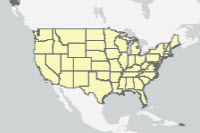

In [630]:
blocks[-1]

In [632]:
m2.add_layer(blocks[0].layers[0])

No proxy information found
(Error Code: 400)


TypeError: 'NoneType' object is not subscriptable

In [731]:
from arcgis.geoanalytics.analyze_patterns import find_hot_spots

In [ ]:
find_hot_spots()

In [633]:
def hot_spots():
    from datetime import datetime as dt

    df = layers[0]
    res = geoanalytics.find_hot_spots(df, 
                                 bin_size=5, 
                                 bin_size_unit="Miles", 
                                 neighborhood_distance=2, 
                                 neighborhood_distance_unit="Miles", 
                                 time_step_interval=1, 
                                 time_step_interval_unit="Days")
    res.write.format("webgis").save("hot_spots_pm25" + str(dt.now().microsecond))

In [603]:
run_python_script(code=hot_spots, layers=[air_lyr])

Submitted.
Executing...
Executing (RunPythonScript): RunPythonScript "def hot_spots():\n    from datetime import datetime as dt\n\n    df = layers[0]\n    res = geoanalytics.find_hot_spots(df, \n                                 bin_size=0.1, \n                                 bin_size_unit="Miles", \n                                 neighborhood_distance=1, \n                                 neighborhood_distance_unit="Miles", \n                                 time_step_interval=1, \n                                 time_step_interval_unit="Days")\n    res.write.format("webgis").save("hot_spots_pm25" + str(dt.now().microsecond))\n\nhot_spots()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCatalogServer/air_quality "{"defaultAggregationStyles": false}"
Start Time: Tue Mar 24 08:45:59 2020
Using URL based GPRecordSet param: https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCata

{"messageCode":"BD_101029","message":"823/1201 distributed tasks completed.","params":{"completedTasks":"823","totalTasks":"1201"}}
{"messageCode":"BD_101029","message":"839/1201 distributed tasks completed.","params":{"completedTasks":"839","totalTasks":"1201"}}
{"messageCode":"BD_101029","message":"858/1201 distributed tasks completed.","params":{"completedTasks":"858","totalTasks":"1201"}}
{"messageCode":"BD_101029","message":"878/1201 distributed tasks completed.","params":{"completedTasks":"878","totalTasks":"1201"}}
{"messageCode":"BD_101029","message":"896/1201 distributed tasks completed.","params":{"completedTasks":"896","totalTasks":"1201"}}
{"messageCode":"BD_101029","message":"913/1201 distributed tasks completed.","params":{"completedTasks":"913","totalTasks":"1201"}}
{"messageCode":"BD_101029","message":"930/1201 distributed tasks completed.","params":{"completedTasks":"930","totalTasks":"1201"}}
{"messageCode":"BD_101029","message":"948/1201 distributed tasks completed."

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def hot_spots():\\n    from datetime import datetime as dt\\n\\n    df = layers[0]\\n    res = geoanalytics.find_hot_spots(df, \\n                                 bin_size=0.1, \\n                                 bin_size_unit="Miles", \\n                                 neighborhood_distance=1, \\n                                 neighborhood_distance_unit="Miles", \\n                                 time_step_interval=1, \\n                                 time_step_interval_unit="Days")\\n    res.write.format("webgis").save("hot_spots_pm25" + str(dt.now().microsecond))\\n\\nhot_spots()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCatalogServer/air_quality "{"defaultAggregationStyles": false}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Tue Mar 24 08:45:59 2020'},
 {'type': 'esriJobMessage

In [604]:
i = gis.content.search('hot_spots_pm25')[0]

In [608]:
spots = i.layers[0]

In [609]:
m2 = gis.map('USA')
m2

MapView(layout=Layout(height='400px', width='100%'))

In [610]:
m2.add_layer(spots)

In [611]:
m2.zoom_to_layer(spots)

commonly used method to take measureement

In [531]:
def measurement_type():
    from datetime import datetime as dt
    # Load the big data file share layer into a DataFrame
    df = layers[0]
    out = df.groupBy('Method Name','Parameter Name').count()
    out.write.format("webgis").save("common_method_type" + str(dt.now().microsecond))

In [532]:
run_python_script(code=measurement_type, layers=[air_lyr])

Submitted.
Executing...
Executing (RunPythonScript): RunPythonScript "def measurement_type():\n    from datetime import datetime as dt\n    # Load the big data file share layer into a DataFrame\n    df = layers[0]\n    out = df.groupBy('Method Name','Parameter Name').count()\n    out.write.format("webgis").save("common_method_type" + str(dt.now().microsecond))\n\nmeasurement_type()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCatalogServer/air_quality "{"defaultAggregationStyles": false}"
Start Time: Mon Mar 23 15:31:34 2020
Using URL based GPRecordSet param: https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCatalogServer/air_quality
{"messageCode":"BD_101028","message":"Starting new distributed job with 1347 tasks.","params":{"totalTasks":"1347"}}
{"messageCode":"BD_101029","message":"0/1347 distributed tasks completed.","params":{"completedTasks":"0","totalTasks":"1347"}}
{

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def measurement_type():\\n    from datetime import datetime as dt\\n    # Load the big data file share layer into a DataFrame\\n    df = layers[0]\\n    out = df.groupBy(\'Method Name\',\'Parameter Name\').count()\\n    out.write.format("webgis").save("common_method_type" + str(dt.now().microsecond))\\n\\nmeasurement_type()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCatalogServer/air_quality "{"defaultAggregationStyles": false}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Mon Mar 23 15:31:34 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Using URL based GPRecordSet param: https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCatalogServer/air_quality'},
 {'type': 'esriJobMessageTypeInformative',
  'description': '{"mess

In [533]:
i = gis.content.search('common_method_type')[0]

In [534]:
method = i.tables[0].query(as_df=True)

In [539]:
method.sort_values(by='count', ascending=False)

,Method_Name,Parameter_Name,count,globalid,OBJECTID
89,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Ozone,10650047,{F47674B9-D171-EC73-944A-DBD928A3D241},112
6,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Outdoor Temperature,9808818,{5244A9FD-EC05-E40A-0C14-006D983E1939},8
158,INSTRUMENTAL - ULTRA VIOLET,Ozone,8634142,{53A7B669-1DF9-B337-6EAD-54C3435BF453},198
213,INSTRUMENTAL - VECTOR SUMMATION,Wind Direction - Resultant,7348868,{C1E2CA38-04FC-AD04-1780-E16CDC75BE18},303
277,INSTRUMENTAL - VECTOR SUMMATION,Wind Speed - Resultant,7267098,{3A70CE26-E728-05D2-83BD-4544A59C75C7},455
...,...,...,...,...,...
234,Cooper Environmental Services model Xact 620 -...,Tin PM10 LC,105,{E2E49C59-B4D1-CD82-FFC9-3DB0CF4E87EC},339
12,Cooper Environmental Services model Xact 620 -...,Calcium PM10 LC,105,{CA9BDACF-8348-FBD2-C975-5C628EC92743},17
304,Cooper Environmental Services model Xact 620 -...,Silver PM10 LC,105,{712E837F-8A6A-88FD-0AFE-E57CECCE8FD2},556
297,Cooper Environmental Services model Xact 620 -...,Vanadium PM10 LC,105,{DD8C1F95-DCA7-0491-7ADB-826E2E08B4EC},526


In [543]:
method.columns

Index(['Method_Name', 'Parameter_Name', 'count', 'globalid', 'OBJECTID'], dtype='object')

In [548]:
pm_instrument = method[method.Parameter_Name =="PM2.5 - Local Conditions"]

In [550]:
pm_instrument.sort_values(by='count', ascending=False)

,Method_Name,Parameter_Name,count,globalid,OBJECTID
227,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PM2.5 - Local Conditions,2825486,{1AF36BA5-C4AC-E657-E570-68787A10D4EE},323
325,Teledyne T640 at 5.0 LPM - Broadband spectroscopy,PM2.5 - Local Conditions,536127,{15122E8B-5FCD-9FF7-604B-93BC20B8CC1A},750
150,Thermo Scientific 5014i or FH62C14-DHS w/VSCC ...,PM2.5 - Local Conditions,468922,{6ADCB5B5-0773-5978-F912-9564F4A0329F},188
231,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,PM2.5 - Local Conditions,456984,{2A72E8BF-2F17-3A1B-5721-99EEC3E649E1},335
101,Thermo Scientific Model 5030 SHARP w/VSCC - Be...,PM2.5 - Local Conditions,382603,{8F21D1BB-AC1B-68DC-3EC7-5E2B0D1C6956},128
39,Thermo Scientific TEOM 1405-DF Dichotomous FDM...,PM2.5 - Local Conditions,309997,{1E950867-C984-E251-7965-166DB9CCF73C},50
133,Teledyne T640X at 16.67 LPM - Broadband spectr...,PM2.5 - Local Conditions,259843,{07DCCF60-731E-63EF-E254-8E33050CC446},168
201,Teledyne Model 602 Beta plus w/VSCC - Beta Att...,PM2.5 - Local Conditions,177646,{60B77369-743E-F079-5DAD-17271303C122},282
283,GRIMM EDM Model 180 with naphion dryer - Laser...,PM2.5 - Local Conditions,95516,{B7FA3068-025A-E296-7D6F-55E1065AA1C5},470
298,Thermo Scientific TEOM 1400 FDMS or 1405 8500C...,PM2.5 - Local Conditions,75739,{4B57A52E-6288-A515-551E-DAB13AE68B84},535


In [636]:
i = gis.content.search('timeseries_data_17_18_19_1station')[0]

In [637]:
i

<Item title:"timeseries_data_17_18_19_1station291167" type:Table Layer owner:admin>

In [638]:
tbl = i.tables[0]

In [639]:
tbl.properties

{
  "copyrightText": "",
  "timeInfo": null,
  "defaultVisibility": true,
  "type": "Table",
  "supportedQueryFormats": "JSON, geoJSON, PBF",
  "relationships": [],
  "objectIdField": "OBJECTID",
  "displayField": null,
  "datasource": {
    "provider": "SDS",
    "name": "gaxe2c72d2286dc470ab8de38460bc32fe2",
    "layerName": "timeseries_data_17_18_19_1station291167"
  },
  "useStandardizedQueries": true,
  "htmlPopupType": "esriServerHTMLPopupTypeNone",
  "typeIdField": "",
  "description": "",
  "minScale": 0,
  "fields": [
    {
      "name": "datetime",
      "alias": "datetime",
      "type": "esriFieldTypeString",
      "domain": null,
      "length": 1000000,
      "nullable": true,
      "editable": true
    },
    {
      "name": "unique_id",
      "alias": "unique_id",
      "type": "esriFieldTypeString",
      "domain": null,
      "length": 1000000,
      "nullable": true,
      "editable": true
    },
    {
      "name": "Barometric_pressure",
      "alias": "Barometric_p

In [18]:
df = tbl.query(as_df=True)

NameError: name 'tbl' is not defined

In [17]:
df

NameError: name 'df' is not defined

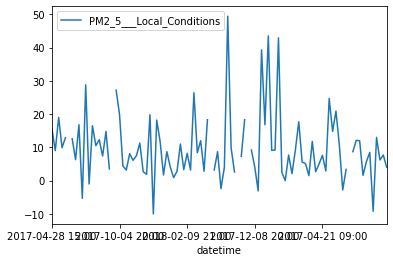

In [367]:
df[:100].plot('datetime', 'PM2_5___Local_Conditions')

In [457]:
cols = ['Outdoor_Temperature', 'Ozone', 'PM10_Total_0_10um_STP',
        'PM2_5___Local_Conditions', 'Relative_Humidity',
        'Wind_Direction___Resultant',
        'Wind_Speed___Resultant', 'datetime']

In [458]:
df = df[cols]

In [342]:
df

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime
0,86.9,0.033,23.0,15.7,50.0,206.0,9.2,2017-04-28 15:00
1,43.9,0.021,5.0,9.0,69.0,285.0,3.7,2017-11-19 07:00
2,66.2,0.007,50.0,19.0,69.0,150.0,2.0,2017-05-26 06:00
3,68.0,NaN,15.0,9.9,91.0,241.0,3.5,2017-03-28 07:00
4,73.6,0.027,NaN,12.9,70.0,216.0,7.6,2018-03-19 18:00
...,...,...,...,...,...,...,...,...
18226,59.5,0.030,10.0,12.8,72.0,216.0,2.6,2017-11-01 03:00
18227,42.1,0.011,NaN,12.6,93.0,104.0,3.6,2018-02-12 17:00
18228,69.4,0.002,24.0,15.8,85.0,143.0,1.2,2017-09-28 06:00
18229,68.5,NaN,NaN,NaN,80.0,176.0,5.5,2017-02-28 19:00


In [288]:
# df.drop(columns=['globalid', 'unique_id'], inplace=True)

interpolate

In [100]:
df.fillna(method='backfill', inplace=True)

In [90]:
df

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime
0,86.9,0.033,23.0,15.7,50.0,206.0,9.2,2017-04-28 15:00
1,43.9,0.021,5.0,9.0,69.0,285.0,3.7,2017-11-19 07:00
2,66.2,0.007,50.0,19.0,69.0,150.0,2.0,2017-05-26 06:00
3,68.0,0.027,15.0,9.9,91.0,241.0,3.5,2017-03-28 07:00
4,73.6,0.027,36.0,12.9,70.0,216.0,7.6,2018-03-19 18:00
...,...,...,...,...,...,...,...,...
18226,59.5,0.030,10.0,12.8,72.0,216.0,2.6,2017-11-01 03:00
18227,42.1,0.011,24.0,12.6,93.0,104.0,3.6,2018-02-12 17:00
18228,69.4,0.002,24.0,15.8,85.0,143.0,1.2,2017-09-28 06:00
18229,68.5,NaN,NaN,NaN,80.0,176.0,5.5,2017-02-28 19:00


df.set_index('Date', inplace=True)

In [459]:
df['Date'] = df['datetime'].astype('datetime64[ns]')

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


df['time'] = pd.to_datetime(df['Date'], unit='ms')
df.set_index('time', inplace=True) #for seasonal
df.index = pd.DatetimeIndex(df.index).to_period('H')

In [460]:
df

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime,Date
0,86.9,0.033,23.0,15.7,50.0,206.0,9.2,2017-04-28 15:00,2017-04-28 15:00:00
1,43.9,0.021,5.0,9.0,69.0,285.0,3.7,2017-11-19 07:00,2017-11-19 07:00:00
2,66.2,0.007,50.0,19.0,69.0,150.0,2.0,2017-05-26 06:00,2017-05-26 06:00:00
3,68.0,NaN,15.0,9.9,91.0,241.0,3.5,2017-03-28 07:00,2017-03-28 07:00:00
4,73.6,0.027,NaN,12.9,70.0,216.0,7.6,2018-03-19 18:00,2018-03-19 18:00:00
...,...,...,...,...,...,...,...,...,...
18226,59.5,0.030,10.0,12.8,72.0,216.0,2.6,2017-11-01 03:00,2017-11-01 03:00:00
18227,42.1,0.011,NaN,12.6,93.0,104.0,3.6,2018-02-12 17:00,2018-02-12 17:00:00
18228,69.4,0.002,24.0,15.8,85.0,143.0,1.2,2017-09-28 06:00,2017-09-28 06:00:00
18229,68.5,NaN,NaN,NaN,80.0,176.0,5.5,2017-02-28 19:00,2017-02-28 19:00:00


In [155]:
mean_pm_by_month = df.resample('M').mean()

In [157]:
mean_pm_by_month.PM10_Total_0_10um_STP

datetime
2017-01    18.072312
2017-02    17.821311
2017-03    18.270833
2017-04    19.104722
2017-05    17.452957
2017-06    15.605556
2017-07    22.325269
2017-08    19.589459
2017-09    25.190808
2017-10    18.513441
2017-11    18.961111
2017-12    18.943069
2018-01    18.701344
2018-02    18.946726
2018-03    17.445161
2018-04    16.714086
2018-05    21.379456
2018-06    21.523703
2018-07    17.080645
2018-08    16.922402
2018-09    13.434722
2018-10    18.089310
2018-11    17.882083
2018-12    16.533065
2019-01    16.275269
Freq: M, Name: PM10_Total_0_10um_STP, dtype: float64

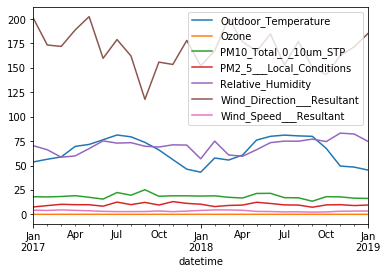

In [156]:
mean_pm_by_month.plot()

In [32]:
df

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant
datetime,,,,,,,
2017-04-28 15:00,86.9,0.033,23.0,15.7,50.0,206.0,9.2
2017-11-19 07:00,43.9,0.021,5.0,9.0,69.0,285.0,3.7
2017-05-26 06:00,66.2,0.007,50.0,19.0,69.0,150.0,2.0
2017-03-28 07:00,68.0,0.027,15.0,9.9,91.0,241.0,3.5
2018-03-19 18:00,73.6,0.027,36.0,12.9,70.0,216.0,7.6
...,...,...,...,...,...,...,...
2017-11-01 03:00,59.5,0.030,10.0,12.8,72.0,216.0,2.6
2018-02-12 17:00,42.1,0.011,24.0,12.6,93.0,104.0,3.6
2017-09-28 06:00,69.4,0.002,24.0,15.8,85.0,143.0,1.2


In [44]:
import seaborn as sns

In [290]:
df['time'] = pd.to_datetime(df['Date'], unit='ms')

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime,Date,time
0,86.9,0.033,23.0,15.7,50.0,206.0,9.2,2017-04-28 15:00,2017-04-28 15:00:00,2017-04-28 15:00:00
1,43.9,0.021,5.0,9.0,69.0,285.0,3.7,2017-11-19 07:00,2017-11-19 07:00:00,2017-11-19 07:00:00
2,66.2,0.007,50.0,19.0,69.0,150.0,2.0,2017-05-26 06:00,2017-05-26 06:00:00,2017-05-26 06:00:00
3,68.0,0.027,15.0,9.9,91.0,241.0,3.5,2017-03-28 07:00,2017-03-28 07:00:00,2017-03-28 07:00:00
4,73.6,0.027,36.0,12.9,70.0,216.0,7.6,2018-03-19 18:00,2018-03-19 18:00:00,2018-03-19 18:00:00
...,...,...,...,...,...,...,...,...,...,...
18226,59.5,0.030,10.0,12.8,72.0,216.0,2.6,2017-11-01 03:00,2017-11-01 03:00:00,2017-11-01 03:00:00
18227,42.1,0.011,24.0,12.6,93.0,104.0,3.6,2018-02-12 17:00,2018-02-12 17:00:00,2018-02-12 17:00:00
18228,69.4,0.002,24.0,15.8,85.0,143.0,1.2,2017-09-28 06:00,2017-09-28 06:00:00,2017-09-28 06:00:00
18229,68.5,NaN,NaN,NaN,80.0,176.0,5.5,2017-02-28 19:00,2017-02-28 19:00:00,2017-02-28 19:00:00


In [104]:
df['day'] = df['time'].dt.day

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
df['month'] = df['time'].dt.month

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
df['year'] = df['time'].dt.year

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
df

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime,Date,time,day,month,year
0,86.9,0.033,23.0,15.7,50.0,206.0,9.2,2017-04-28 15:00,2017-04-28 15:00:00,2017-04-28 15:00:00,28,4,2017
1,43.9,0.021,5.0,9.0,69.0,285.0,3.7,2017-11-19 07:00,2017-11-19 07:00:00,2017-11-19 07:00:00,19,11,2017
2,66.2,0.007,50.0,19.0,69.0,150.0,2.0,2017-05-26 06:00,2017-05-26 06:00:00,2017-05-26 06:00:00,26,5,2017
3,68.0,0.027,15.0,9.9,91.0,241.0,3.5,2017-03-28 07:00,2017-03-28 07:00:00,2017-03-28 07:00:00,28,3,2017
4,73.6,0.027,36.0,12.9,70.0,216.0,7.6,2018-03-19 18:00,2018-03-19 18:00:00,2018-03-19 18:00:00,19,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18226,59.5,0.030,10.0,12.8,72.0,216.0,2.6,2017-11-01 03:00,2017-11-01 03:00:00,2017-11-01 03:00:00,1,11,2017
18227,42.1,0.011,24.0,12.6,93.0,104.0,3.6,2018-02-12 17:00,2018-02-12 17:00:00,2018-02-12 17:00:00,12,2,2018
18228,69.4,0.002,24.0,15.8,85.0,143.0,1.2,2017-09-28 06:00,2017-09-28 06:00:00,2017-09-28 06:00:00,28,9,2017
18229,68.5,NaN,NaN,NaN,80.0,176.0,5.5,2017-02-28 19:00,2017-02-28 19:00:00,2017-02-28 19:00:00,28,2,2017


In [62]:
df[df.month == 1]

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime,Date,time,day,month,year
14,61.5,0.058,15.0,12.3,90.0,247.0,0.5,2017-01-13 02:00,2017-01-13 02:00:00,2017-01-13 02:00:00,13,1,2017
22,46.0,0.019,17.0,3.2,34.0,250.0,2.4,2017-01-28 19:00,2017-01-28 19:00:00,2017-01-28 19:00:00,28,1,2017
25,32.2,0.002,17.0,7.5,80.0,61.0,1.8,2017-01-05 05:00,2017-01-05 05:00:00,2017-01-05 05:00:00,5,1,2017
68,50.7,0.049,19.0,2.5,96.0,280.0,4.4,2017-01-22 17:00,2017-01-22 17:00:00,2017-01-22 17:00:00,22,1,2017
82,32.0,0.029,20.0,24.7,48.0,85.0,7.2,2018-01-01 10:00,2018-01-01 10:00:00,2018-01-01 10:00:00,1,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18195,60.4,0.044,14.9,6.1,35.0,246.0,7.2,2019-01-28 13:00,2019-01-28 13:00:00,2019-01-28 13:00:00,28,1,2019
18204,49.3,0.024,19.0,4.8,75.0,313.0,4.2,2017-01-23 21:00,2017-01-23 21:00:00,2017-01-23 21:00:00,23,1,2017
18208,39.9,0.024,8.0,5.2,99.0,286.0,3.0,2019-01-05 07:00,2019-01-05 07:00:00,2019-01-05 07:00:00,5,1,2019
18210,44.8,0.027,55.0,0.9,57.0,305.0,6.9,2017-01-26 07:00,2017-01-26 07:00:00,2017-01-26 07:00:00,26,1,2017


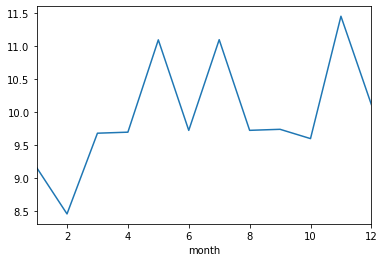

In [59]:
df.groupby('month').mean().PM2_5___Local_Conditions.plot()

In [345]:
df

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime,Date
0,86.9,0.033,23.0,15.7,50.0,206.0,9.2,2017-04-28 15:00,2017-04-28 15:00:00
1,43.9,0.021,5.0,9.0,69.0,285.0,3.7,2017-11-19 07:00,2017-11-19 07:00:00
2,66.2,0.007,50.0,19.0,69.0,150.0,2.0,2017-05-26 06:00,2017-05-26 06:00:00
3,68.0,NaN,15.0,9.9,91.0,241.0,3.5,2017-03-28 07:00,2017-03-28 07:00:00
4,73.6,0.027,NaN,12.9,70.0,216.0,7.6,2018-03-19 18:00,2018-03-19 18:00:00
...,...,...,...,...,...,...,...,...,...
18226,59.5,0.030,10.0,12.8,72.0,216.0,2.6,2017-11-01 03:00,2017-11-01 03:00:00
18227,42.1,0.011,NaN,12.6,93.0,104.0,3.6,2018-02-12 17:00,2018-02-12 17:00:00
18228,69.4,0.002,24.0,15.8,85.0,143.0,1.2,2017-09-28 06:00,2017-09-28 06:00:00
18229,68.5,NaN,NaN,NaN,80.0,176.0,5.5,2017-02-28 19:00,2017-02-28 19:00:00


In [378]:
df.set_index('Date', inplace=True)

In [379]:
df

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime
Date,,,,,,,,
2017-04-28 15:00:00,86.9,0.033,23.0,15.7,50.0,206.0,9.2,2017-04-28 15:00
2017-11-19 07:00:00,43.9,0.021,5.0,9.0,69.0,285.0,3.7,2017-11-19 07:00
2017-05-26 06:00:00,66.2,0.007,50.0,19.0,69.0,150.0,2.0,2017-05-26 06:00
2017-03-28 07:00:00,68.0,NaN,15.0,9.9,91.0,241.0,3.5,2017-03-28 07:00
2018-03-19 18:00:00,73.6,0.027,NaN,12.9,70.0,216.0,7.6,2018-03-19 18:00
...,...,...,...,...,...,...,...,...
2017-11-01 03:00:00,59.5,0.030,10.0,12.8,72.0,216.0,2.6,2017-11-01 03:00
2018-02-12 17:00:00,42.1,0.011,NaN,12.6,93.0,104.0,3.6,2018-02-12 17:00
2017-09-28 06:00:00,69.4,0.002,24.0,15.8,85.0,143.0,1.2,2017-09-28 06:00


In [348]:
df.columns

Index(['Outdoor_Temperature', 'Ozone', 'PM10_Total_0_10um_STP',
       'PM2_5___Local_Conditions', 'Relative_Humidity',
       'Wind_Direction___Resultant', 'Wind_Speed___Resultant', 'datetime'],
      dtype='object')

In [72]:
df.drop(columns=['datetime', 'Date'], inplace=True)

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [463]:
df = df[['PM2_5___Local_Conditions']]

In [464]:
df

,PM2_5___Local_Conditions
time,
2017-04-28 15:00:00,15.7
2017-11-19 07:00:00,9.0
2017-05-26 06:00:00,19.0
2017-03-28 07:00:00,9.9
2018-03-19 18:00:00,12.9
...,...
2017-11-01 03:00:00,12.8
2018-02-12 17:00:00,12.6
2017-09-28 06:00:00,15.8


In [466]:
df.fillna(0, inplace=True)

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [467]:
df

,PM2_5___Local_Conditions
time,
2017-04-28 15:00:00,15.7
2017-11-19 07:00:00,9.0
2017-05-26 06:00:00,19.0
2017-03-28 07:00:00,9.9
2018-03-19 18:00:00,12.9
...,...
2017-11-01 03:00:00,12.8
2018-02-12 17:00:00,12.6
2017-09-28 06:00:00,15.8


In [468]:
original = df.copy()

In [469]:
new_S=pd.Series()
for i,item in enumerate(df['PM2_5___Local_Conditions']):
    if item<=0:
        df['PM2_5___Local_Conditions'].iloc[i]=df['PM2_5___Local_Conditions'].iloc[i-1]
    else:
        df['PM2_5___Local_Conditions'].iloc[i]=item

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [470]:
df

,PM2_5___Local_Conditions
time,
2017-04-28 15:00:00,15.7
2017-11-19 07:00:00,9.0
2017-05-26 06:00:00,19.0
2017-03-28 07:00:00,9.9
2018-03-19 18:00:00,12.9
...,...
2017-11-01 03:00:00,12.8
2018-02-12 17:00:00,12.6
2017-09-28 06:00:00,15.8


In [461]:
df['time'] = pd.to_datetime(df['Date'], unit='ms')
df.set_index('time', inplace=True) #for seasonal
# df.index = pd.DatetimeIndex(df.index).to_period('H')

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [462]:
df

,Outdoor_Temperature,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Relative_Humidity,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime,Date
time,,,,,,,,,
2017-04-28 15:00:00,86.9,0.033,23.0,15.7,50.0,206.0,9.2,2017-04-28 15:00,2017-04-28 15:00:00
2017-11-19 07:00:00,43.9,0.021,5.0,9.0,69.0,285.0,3.7,2017-11-19 07:00,2017-11-19 07:00:00
2017-05-26 06:00:00,66.2,0.007,50.0,19.0,69.0,150.0,2.0,2017-05-26 06:00,2017-05-26 06:00:00
2017-03-28 07:00:00,68.0,NaN,15.0,9.9,91.0,241.0,3.5,2017-03-28 07:00,2017-03-28 07:00:00
2018-03-19 18:00:00,73.6,0.027,NaN,12.9,70.0,216.0,7.6,2018-03-19 18:00,2018-03-19 18:00:00
...,...,...,...,...,...,...,...,...,...
2017-11-01 03:00:00,59.5,0.030,10.0,12.8,72.0,216.0,2.6,2017-11-01 03:00,2017-11-01 03:00:00
2018-02-12 17:00:00,42.1,0.011,NaN,12.6,93.0,104.0,3.6,2018-02-12 17:00,2018-02-12 17:00:00
2017-09-28 06:00:00,69.4,0.002,24.0,15.8,85.0,143.0,1.2,2017-09-28 06:00,2017-09-28 06:00:00


In [413]:
df

,PM2_5___Local_Conditions
time,
2017-01-01 00:00,2.3
2017-01-01 01:00,9.0
2017-01-01 02:00,8.2
2017-01-01 03:00,3.1
2017-01-01 04:00,4.0
...,...
2019-01-31 19:00,9.9
2019-01-31 20:00,10.5
2019-01-31 21:00,13.6


In [471]:
df.sort_index(inplace=True)

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [472]:
df

,PM2_5___Local_Conditions
time,
2017-01-01 00:00:00,2.3
2017-01-01 01:00:00,9.0
2017-01-01 02:00:00,8.2
2017-01-01 03:00:00,3.1
2017-01-01 04:00:00,4.0
...,...
2019-01-31 19:00:00,9.9
2019-01-31 20:00:00,10.5
2019-01-31 21:00:00,13.6


In [474]:
v = pd.date_range(start='2016-12-31 23:00:00', periods=26280, freq='H', closed='right')
newdf = pd.DataFrame(index=v)

In [475]:
newdf

""
2017-01-01 00:00:00
2017-01-01 01:00:00
2017-01-01 02:00:00
2017-01-01 03:00:00
2017-01-01 04:00:00
...
2019-12-31 18:00:00
2019-12-31 19:00:00
2019-12-31 20:00:00
2019-12-31 21:00:00


In [450]:
df

,PM2_5___Local_Conditions
time,
2017-01-01 00:00,2.3
2017-01-01 01:00,9.0
2017-01-01 02:00,8.2
2017-01-01 03:00,3.1
2017-01-01 04:00,4.0
...,...
2019-01-31 19:00,9.9
2019-01-31 20:00,10.5
2019-01-31 21:00,13.6


In [439]:
newdf

""
2017-01-01 01:00:00
2017-01-01 02:00:00
2017-01-01 03:00:00
2017-01-01 04:00:00
2017-01-01 05:00:00
...
2019-12-31 19:00:00
2019-12-31 20:00:00
2019-12-31 21:00:00
2019-12-31 22:00:00


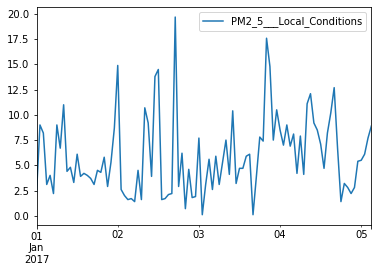

In [509]:
merge[:100].plot()

In [476]:
merge=pd.merge(newdf, df, how='left', left_index=True, right_index=True)

In [477]:
merge

,PM2_5___Local_Conditions
2017-01-01 00:00:00,2.3
2017-01-01 01:00:00,9.0
2017-01-01 02:00:00,8.2
2017-01-01 03:00:00,3.1
2017-01-01 04:00:00,4.0
...,...
2019-12-31 18:00:00,NaN
2019-12-31 19:00:00,NaN
2019-12-31 20:00:00,NaN
2019-12-31 21:00:00,NaN


In [480]:
merge.interpolate(method='time', inplace=True)

In [486]:
merge.isna().sum()

PM2_5___Local_Conditions    0
dtype: int64

In [489]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(merge, model='additive')

2017-01-01 00:00:00    1.509670
2017-01-01 01:00:00    1.650461
2017-01-01 02:00:00    1.512879
2017-01-01 03:00:00    1.178316
2017-01-01 04:00:00    0.884145
2017-01-01 05:00:00    0.915391
2017-01-01 06:00:00    1.031509
2017-01-01 07:00:00    1.117029
2017-01-01 08:00:00    0.860983
2017-01-01 09:00:00   -0.189962
2017-01-01 10:00:00   -0.701336
2017-01-01 11:00:00   -1.188366
2017-01-01 12:00:00   -1.422843
2017-01-01 13:00:00   -1.440770
2017-01-01 14:00:00   -1.689435
2017-01-01 15:00:00   -1.502014
2017-01-01 16:00:00   -1.294734
2017-01-01 17:00:00   -1.129976
2017-01-01 18:00:00   -0.616493
2017-01-01 19:00:00   -0.670603
2017-01-01 20:00:00   -0.199081
2017-01-01 21:00:00    0.204665
2017-01-01 22:00:00    0.540239
2017-01-01 23:00:00    0.640326
2017-01-02 00:00:00    1.509670
2017-01-02 01:00:00    1.650461
2017-01-02 02:00:00    1.512879
2017-01-02 03:00:00    1.178316
2017-01-02 04:00:00    0.884145
2017-01-02 05:00:00    0.915391
Freq: H, Name: seasonal, dtype: float64

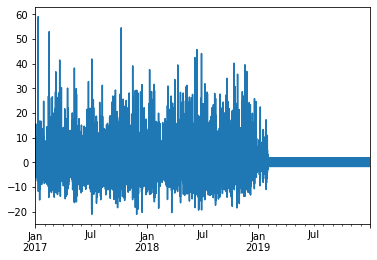

In [515]:
result.resid.plot()

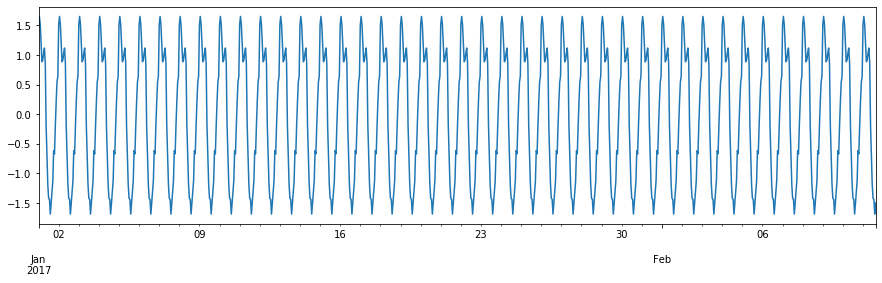

In [641]:
plt.figure(figsize=(15,4))
result.seasonal[:1000].plot()

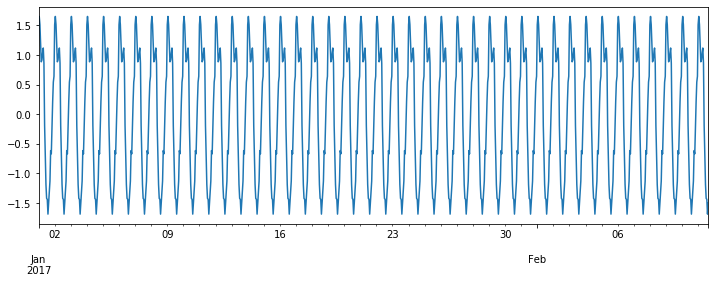

In [506]:
plt.figure(figsize=(15,4))
result.seasonal[:1000].plot()

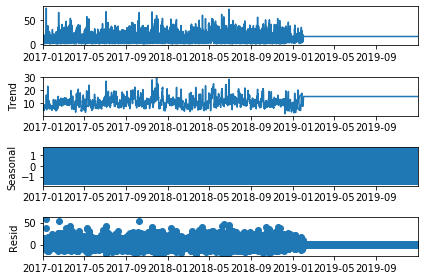

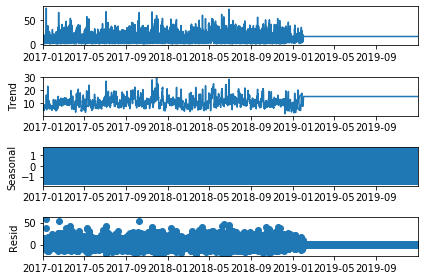

In [644]:
result.plot()

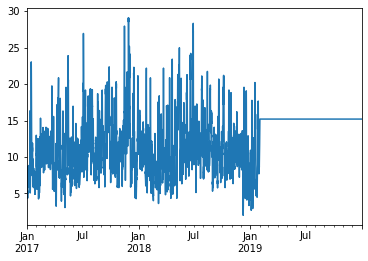

In [643]:
result.trend.plot()

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive', period=1)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


time
2017-04-28 15:00:00    15.7
2017-11-19 07:00:00     9.0
2017-05-26 06:00:00    19.0
2017-03-28 07:00:00     9.9
2018-03-19 18:00:00    12.9
                       ... 
2018-02-12 00:00:00     7.9
2018-01-23 21:00:00     7.0
2017-11-01 03:00:00    12.8
2018-02-12 17:00:00    12.6
2017-09-28 06:00:00    15.8
Name: trend, Length: 18229, dtype: float64
time
2017-04-28 15:00:00    0.0
2017-11-19 07:00:00    0.0
2017-05-26 06:00:00    0.0
2017-03-28 07:00:00    0.0
2018-03-19 18:00:00    0.0
                      ... 
2018-02-12 00:00:00    0.0
2018-01-23 21:00:00    0.0
2017-11-01 03:00:00    0.0
2018-02-12 17:00:00    0.0
2017-09-28 06:00:00    0.0
Name: seasonal, Length: 18229, dtype: float64
time
2017-04-28 15:00:00    0.0
2017-11-19 07:00:00    0.0
2017-05-26 06:00:00    0.0
2017-03-28 07:00:00    0.0
2018-03-19 18:00:00    0.0
                      ... 
2018-02-12 00:00:00    0.0
2018-01-23 21:00:00    0.0
2017-11-01 03:00:00    0.0
2018-02-12 17:00:00    0.0
2017-09-28 06:00:00  

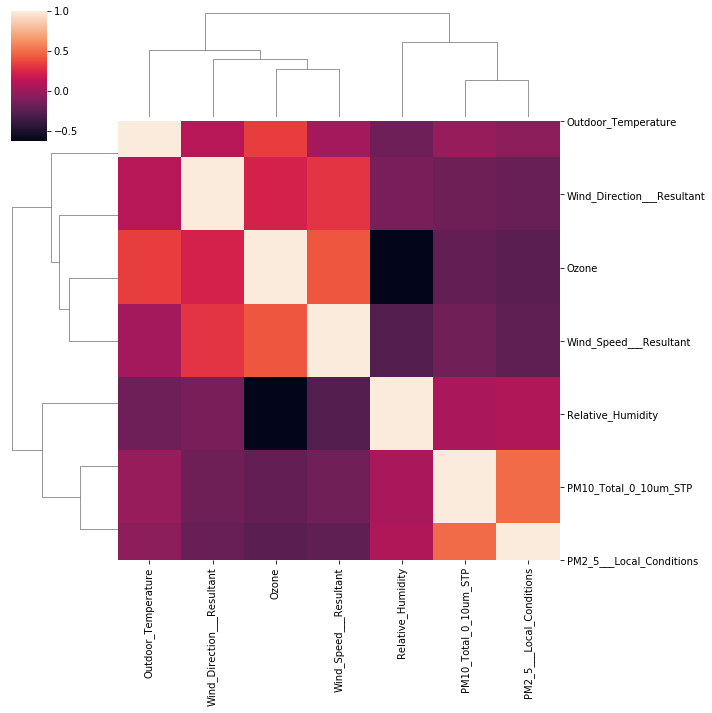

In [45]:
sns.clustermap(df.corr())

explore holiday, weekly and day-night trend

In [645]:
df

,Barometric_pressure,Carbon_monoxide,Nitric_oxide__NO_,Nitrogen_dioxide__NO2_,OBJECTID,Outdoor_Temperature,Oxides_of_nitrogen__NOx_,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Reactive_oxides_of_nitrogen__NOy_,Relative_Humidity,Sulfur_dioxide,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime,globalid,unique_id
0,992.7,0.059,0.70,3.0,1,86.9,4.0,0.033,23.0,15.7,3.7,50.0,0.8,206.0,9.2,2017-04-28 15:00,{8E2CB27D-96C6-6FA2-46E9-1EA28BDCC1FF},010730023
1,999.0,NaN,0.70,2.7,2,43.9,3.5,0.021,5.0,9.0,3.8,69.0,0.0,285.0,3.7,2017-11-19 07:00,{98B0D3C7-7219-2C73-98C3-31F862DC2E86},010730023
2,995.8,NaN,31.40,21.5,3,66.2,55.9,0.007,50.0,19.0,48.5,69.0,6.4,150.0,2.0,2017-05-26 06:00,{5467D1C2-503A-A94F-11BC-C1DFB93CD0EA},010730023
3,995.2,0.422,8.55,18.9,4,68.0,28.1,NaN,15.0,9.9,24.0,91.0,0.3,241.0,3.5,2017-03-28 07:00,{27FC92CA-4941-ADB0-7E5E-EFB9018E02BB},010730023
4,978.2,NaN,0.25,4.9,5,73.6,5.3,0.027,NaN,12.9,4.4,70.0,0.2,216.0,7.6,2018-03-19 18:00,{37EA6335-6768-0C0B-D0D5-56D9A3F6C6BA},010730023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18226,997.4,0.285,0.00,10.1,21983,59.5,10.2,0.030,10.0,12.8,NaN,72.0,NaN,216.0,2.6,2017-11-01 03:00,{0B3F91C9-6613-6609-998B-7E5446092E3C},010730023
18227,1009.1,NaN,0.95,7.9,22016,42.1,9.1,0.011,NaN,12.6,9.3,93.0,0.0,104.0,3.6,2018-02-12 17:00,{B691D558-2F6C-B180-1C61-4A1280765D7E},010730023
18228,995.2,NaN,20.10,NaN,22073,69.4,NaN,0.002,24.0,15.8,33.7,85.0,NaN,143.0,1.2,2017-09-28 06:00,{33BDA1B1-87E8-B4DA-F57E-87BB9AD05FE9},010730023
18229,997.2,0.351,0.10,4.7,22273,68.5,4.9,NaN,NaN,NaN,4.1,80.0,NaN,176.0,5.5,2017-02-28 19:00,{732EA0C0-B98A-B2A6-383B-378A608AE4E5},010730023


In [646]:
cols = ['PM2_5___Local_Conditions', 'datetime']

In [647]:
df = df[cols]

In [648]:
df

,PM2_5___Local_Conditions,datetime
0,15.7,2017-04-28 15:00
1,9.0,2017-11-19 07:00
2,19.0,2017-05-26 06:00
3,9.9,2017-03-28 07:00
4,12.9,2018-03-19 18:00
...,...,...
18226,12.8,2017-11-01 03:00
18227,12.6,2018-02-12 17:00
18228,15.8,2017-09-28 06:00
18229,NaN,2017-02-28 19:00


In [649]:
df['Date'] = df['datetime'].astype('datetime64[ns]')

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [650]:
df

,PM2_5___Local_Conditions,datetime,Date
0,15.7,2017-04-28 15:00,2017-04-28 15:00:00
1,9.0,2017-11-19 07:00,2017-11-19 07:00:00
2,19.0,2017-05-26 06:00,2017-05-26 06:00:00
3,9.9,2017-03-28 07:00,2017-03-28 07:00:00
4,12.9,2018-03-19 18:00,2018-03-19 18:00:00
...,...,...,...
18226,12.8,2017-11-01 03:00,2017-11-01 03:00:00
18227,12.6,2018-02-12 17:00,2018-02-12 17:00:00
18228,15.8,2017-09-28 06:00,2017-09-28 06:00:00
18229,NaN,2017-02-28 19:00,2017-02-28 19:00:00


In [651]:
df['time'] = pd.to_datetime(df['Date'], unit='ms')

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [652]:
df

,PM2_5___Local_Conditions,datetime,Date,time
0,15.7,2017-04-28 15:00,2017-04-28 15:00:00,2017-04-28 15:00:00
1,9.0,2017-11-19 07:00,2017-11-19 07:00:00,2017-11-19 07:00:00
2,19.0,2017-05-26 06:00,2017-05-26 06:00:00,2017-05-26 06:00:00
3,9.9,2017-03-28 07:00,2017-03-28 07:00:00,2017-03-28 07:00:00
4,12.9,2018-03-19 18:00,2018-03-19 18:00:00,2018-03-19 18:00:00
...,...,...,...,...
18226,12.8,2017-11-01 03:00,2017-11-01 03:00:00,2017-11-01 03:00:00
18227,12.6,2018-02-12 17:00,2018-02-12 17:00:00,2018-02-12 17:00:00
18228,15.8,2017-09-28 06:00,2017-09-28 06:00:00,2017-09-28 06:00:00
18229,NaN,2017-02-28 19:00,2017-02-28 19:00:00,2017-02-28 19:00:00


In [653]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\ipykernel_launcher.py:

In [654]:
df

,PM2_5___Local_Conditions,datetime,Date,time,day,month,year
0,15.7,2017-04-28 15:00,2017-04-28 15:00:00,2017-04-28 15:00:00,28,4,2017
1,9.0,2017-11-19 07:00,2017-11-19 07:00:00,2017-11-19 07:00:00,19,11,2017
2,19.0,2017-05-26 06:00,2017-05-26 06:00:00,2017-05-26 06:00:00,26,5,2017
3,9.9,2017-03-28 07:00,2017-03-28 07:00:00,2017-03-28 07:00:00,28,3,2017
4,12.9,2018-03-19 18:00,2018-03-19 18:00:00,2018-03-19 18:00:00,19,3,2018
...,...,...,...,...,...,...,...
18226,12.8,2017-11-01 03:00,2017-11-01 03:00:00,2017-11-01 03:00:00,1,11,2017
18227,12.6,2018-02-12 17:00,2018-02-12 17:00:00,2018-02-12 17:00:00,12,2,2018
18228,15.8,2017-09-28 06:00,2017-09-28 06:00:00,2017-09-28 06:00:00,28,9,2017
18229,NaN,2017-02-28 19:00,2017-02-28 19:00:00,2017-02-28 19:00:00,28,2,2017


In [655]:
df.set_index('time', inplace=True)

In [656]:
df

,PM2_5___Local_Conditions,datetime,Date,day,month,year
time,,,,,,
2017-04-28 15:00:00,15.7,2017-04-28 15:00,2017-04-28 15:00:00,28,4,2017
2017-11-19 07:00:00,9.0,2017-11-19 07:00,2017-11-19 07:00:00,19,11,2017
2017-05-26 06:00:00,19.0,2017-05-26 06:00,2017-05-26 06:00:00,26,5,2017
2017-03-28 07:00:00,9.9,2017-03-28 07:00,2017-03-28 07:00:00,28,3,2017
2018-03-19 18:00:00,12.9,2018-03-19 18:00,2018-03-19 18:00:00,19,3,2018
...,...,...,...,...,...,...
2017-11-01 03:00:00,12.8,2017-11-01 03:00,2017-11-01 03:00:00,1,11,2017
2018-02-12 17:00:00,12.6,2018-02-12 17:00,2018-02-12 17:00:00,12,2,2018
2017-09-28 06:00:00,15.8,2017-09-28 06:00,2017-09-28 06:00:00,28,9,2017


In [660]:
pm = df['PM2_5___Local_Conditions']

In [700]:
vf = df.sort_index()
vf[1100:1150]

,PM2_5___Local_Conditions,datetime,Date,day,month,year
time,,,,,,
2017-02-15 20:00:00,NaN,2017-02-15 20:00,2017-02-15 20:00:00,15,2,2017
2017-02-15 21:00:00,NaN,2017-02-15 21:00,2017-02-15 21:00:00,15,2,2017
2017-02-15 22:00:00,NaN,2017-02-15 22:00,2017-02-15 22:00:00,15,2,2017
2017-02-15 23:00:00,NaN,2017-02-15 23:00,2017-02-15 23:00:00,15,2,2017
2017-02-16 00:00:00,NaN,2017-02-16 00:00,2017-02-16 00:00:00,16,2,2017
2017-02-16 01:00:00,NaN,2017-02-16 01:00,2017-02-16 01:00:00,16,2,2017
2017-02-16 02:00:00,NaN,2017-02-16 02:00,2017-02-16 02:00:00,16,2,2017
2017-02-16 03:00:00,NaN,2017-02-16 03:00,2017-02-16 03:00:00,16,2,2017
2017-02-16 04:00:00,NaN,2017-02-16 04:00,2017-02-16 04:00:00,16,2,2017


In [661]:
mean_pm_by_month = pm.resample('M').mean()

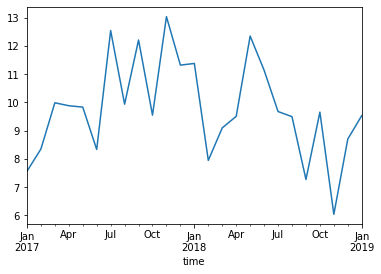

In [663]:
mean_pm_by_month.plot()

In [705]:
mean_pm_by_hr = pm.resample('H').mean()

In [706]:
mean_pm_by_hr.sort_index(inplace=True)

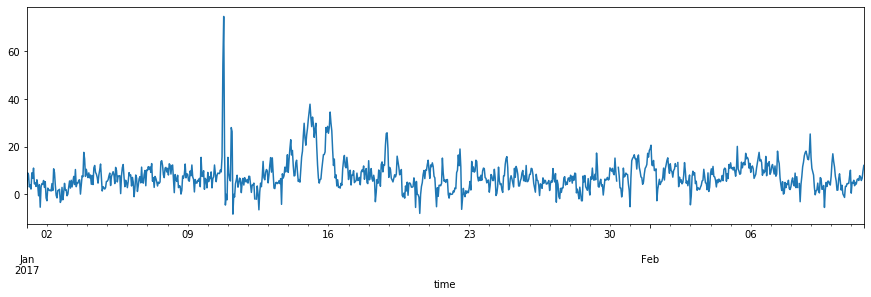

In [709]:
plt.figure(figsize=(15,4))
mean_pm_by_hr[:1000].plot()

In [681]:
mean_pm_by_hr[200:250]

time
2017-02-20 00:00:00   NaN
2017-02-20 06:00:00   NaN
2017-02-20 12:00:00   NaN
2017-02-20 18:00:00   NaN
2017-02-21 00:00:00   NaN
2017-02-21 06:00:00   NaN
2017-02-21 12:00:00   NaN
2017-02-21 18:00:00   NaN
2017-02-22 00:00:00   NaN
2017-02-22 06:00:00   NaN
2017-02-22 12:00:00   NaN
2017-02-22 18:00:00   NaN
2017-02-23 00:00:00   NaN
2017-02-23 06:00:00   NaN
2017-02-23 12:00:00   NaN
2017-02-23 18:00:00   NaN
2017-02-24 00:00:00   NaN
2017-02-24 06:00:00   NaN
2017-02-24 12:00:00   NaN
2017-02-24 18:00:00   NaN
2017-02-25 00:00:00   NaN
2017-02-25 06:00:00   NaN
2017-02-25 12:00:00   NaN
2017-02-25 18:00:00   NaN
2017-02-26 00:00:00   NaN
2017-02-26 06:00:00   NaN
2017-02-26 12:00:00   NaN
2017-02-26 18:00:00   NaN
2017-02-27 00:00:00   NaN
2017-02-27 06:00:00   NaN
2017-02-27 12:00:00   NaN
2017-02-27 18:00:00   NaN
2017-02-28 00:00:00   NaN
2017-02-28 06:00:00   NaN
2017-02-28 12:00:00   NaN
2017-02-28 18:00:00   NaN
2017-03-01 00:00:00   NaN
2017-03-01 06:00:00   NaN
2017-03

In [701]:
mean_pm_by_day = pm.resample('D').mean()

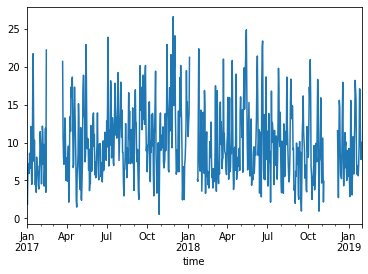

In [710]:
mean_pm_by_day[:1000].plot()

find average pm by state

In [20]:
df

,Barometric_pressure,Carbon_monoxide,Nitric_oxide__NO_,Nitrogen_dioxide__NO2_,OBJECTID,Outdoor_Temperature,Oxides_of_nitrogen__NOx_,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Reactive_oxides_of_nitrogen__NOy_,Relative_Humidity,Sulfur_dioxide,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime,globalid,unique_id
0,992.7,0.059,0.70,3.0,1,86.9,4.0,0.033,23.0,15.7,3.7,50.0,0.8,206.0,9.2,2017-04-28 15:00,{8E2CB27D-96C6-6FA2-46E9-1EA28BDCC1FF},010730023
1,999.0,NaN,0.70,2.7,2,43.9,3.5,0.021,5.0,9.0,3.8,69.0,0.0,285.0,3.7,2017-11-19 07:00,{98B0D3C7-7219-2C73-98C3-31F862DC2E86},010730023
2,995.8,NaN,31.40,21.5,3,66.2,55.9,0.007,50.0,19.0,48.5,69.0,6.4,150.0,2.0,2017-05-26 06:00,{5467D1C2-503A-A94F-11BC-C1DFB93CD0EA},010730023
3,995.2,0.422,8.55,18.9,4,68.0,28.1,NaN,15.0,9.9,24.0,91.0,0.3,241.0,3.5,2017-03-28 07:00,{27FC92CA-4941-ADB0-7E5E-EFB9018E02BB},010730023
4,978.2,NaN,0.25,4.9,5,73.6,5.3,0.027,NaN,12.9,4.4,70.0,0.2,216.0,7.6,2018-03-19 18:00,{37EA6335-6768-0C0B-D0D5-56D9A3F6C6BA},010730023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18226,997.4,0.285,0.00,10.1,21983,59.5,10.2,0.030,10.0,12.8,NaN,72.0,NaN,216.0,2.6,2017-11-01 03:00,{0B3F91C9-6613-6609-998B-7E5446092E3C},010730023
18227,1009.1,NaN,0.95,7.9,22016,42.1,9.1,0.011,NaN,12.6,9.3,93.0,0.0,104.0,3.6,2018-02-12 17:00,{B691D558-2F6C-B180-1C61-4A1280765D7E},010730023
18228,995.2,NaN,20.10,NaN,22073,69.4,NaN,0.002,24.0,15.8,33.7,85.0,NaN,143.0,1.2,2017-09-28 06:00,{33BDA1B1-87E8-B4DA-F57E-87BB9AD05FE9},010730023
18229,997.2,0.351,0.10,4.7,22273,68.5,4.9,NaN,NaN,NaN,4.1,80.0,NaN,176.0,5.5,2017-02-28 19:00,{732EA0C0-B98A-B2A6-383B-378A608AE4E5},010730023


In [ ]:
def average_pm_by_state():
    
